t-SNE (t-distributed Stochastic Neighbor Embedding или стохастическое вложение соседей с t-распределением ) – это метод снижения размерности и визуализации данных, который позволяет сохранить локальные структуры данных и обнаруживать нелинейные зависимости. Основная идея заключается в том, чтобы преобразовать исходные данные таким образом, чтобы схожие объекты в исходном пространстве сохраняли свою схожесть и в новом, сниженном пространстве.

Одной из ключевых особенностей t-SNE является то, что он нацелен на сохранение локальных структур данных, что делает его особенно полезным для визуализации скрытых паттернов в данных.

Расчет условных вероятностей сходства объектов
Процесс работы t-SNE начинается с расчета условных вероятностей сходства объектов в исходном пространстве. Эти вероятности показывают, насколько вероятно, что объект i выберет объект j в качестве своего соседа, если выбирать соседей пропорционально их вероятности быть соседом для i.

Создание распределения вероятностей для целевого пространства
Затем, t-SNE строит распределение вероятностей для целевого пространства, таким образом, чтобы объекты, которые близки в исходном пространстве, имели высокие вероятности быть близкими и в сниженном пространстве. Это достигается путем оптимизации функции Кульбака-Лейблера между распределениями вероятностей P и Q.

Минимизация расхождения Кульбака-Лейблера для получения проекции
Процесс t-SNE заключается в минимизации расхождения Кульбака-Лейблера между двумя распределениями вероятностей: распределением вероятностей P, которое вычисляется для исходных данных, и распределением вероятностей Q, которое строится для целевого (сниженного) пространства. Минимизация расхождения позволяет нам получить проекцию данных в сниженное пространство таким образом, чтобы схожие объекты оставались близкими, а различные объекты – располагались на некотором расстоянии друг от друга.

1. Важность настройки гиперпараметров
Одной из особенностей t-SNE является наличие нескольких гиперпараметров, настройка которых может существенно влиять на результаты. Один из ключевых параметров – это перплексия (perplexity). Она определяет, сколько соседей учитываются в расчете условных вероятностей сходства. Большая перплексия приводит к усреднению вероятностей и созданию более глобальной структуры, в то время как маленькая перплексия подчеркивает локальную структуру.

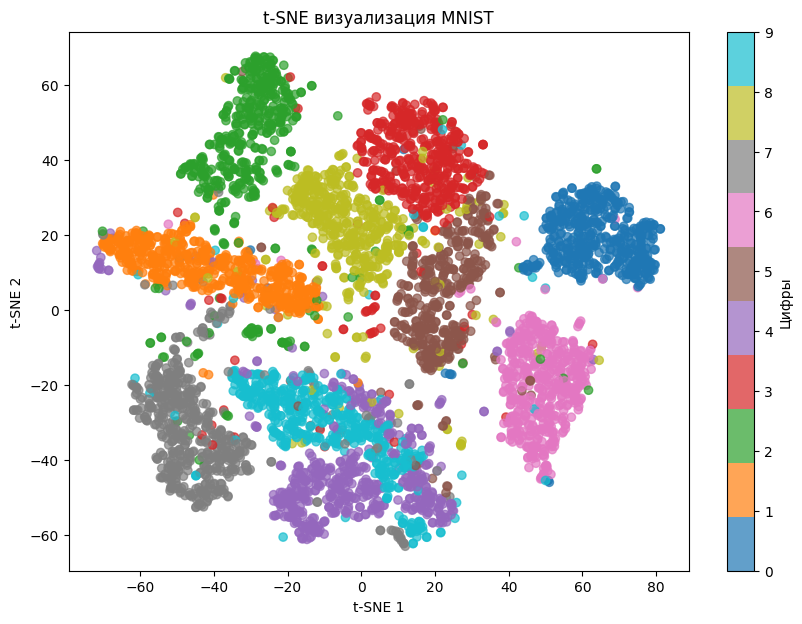

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.manifold import TSNE

# Загрузка данных
(X_train, y_train), (_, _) = mnist.load_data()

# Преобразуем изображения в вектор (28x28 = 784)
X_train = X_train.reshape(-1, 28*28).astype(np.float32) / 255.0  # Нормализация

# Возьмём 5000 примеров для ускорения вычислений
n_samples = 5000
X_subset = X_train[:n_samples]
y_subset = y_train[:n_samples]

# Применяем t-SNE для понижения размерности до 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X_subset)

# Визуализация результатов
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_subset, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Цифры")
plt.title("t-SNE визуализация MNIST")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


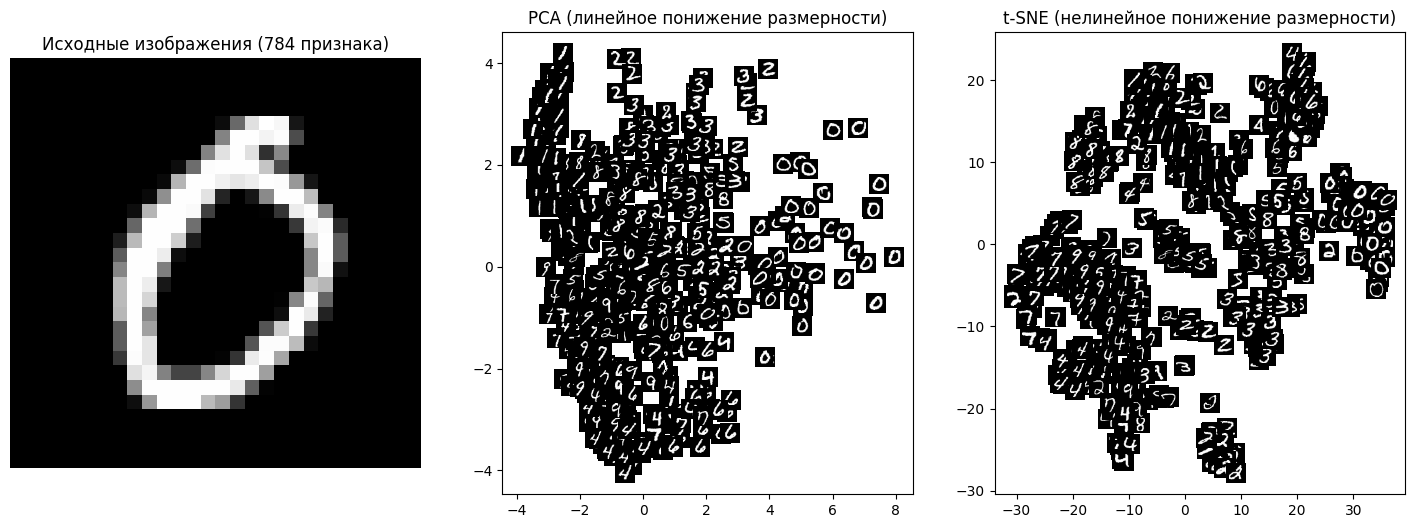

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.offsetbox as offsetbox
from tensorflow.keras.datasets import mnist
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Загружаем MNIST
(X_train, y_train), (_, _) = mnist.load_data()

# Преобразуем изображения в векторы (784 признака) и нормализуем
X_train = X_train.reshape(-1, 28*28).astype(np.float32) / 255.0

# Выбираем 500 примеров
n_samples = 500
X_subset = X_train[:n_samples]
y_subset = y_train[:n_samples]
X_subset_images = X_train[:n_samples].reshape(-1, 28, 28)  # Оригинальные изображения

# Применяем PCA для линейного понижения размерности
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

# Применяем t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

# Функция для визуализации
def plot_with_images(ax, points, images, labels, title):
    scatter = ax.scatter(points[:, 0], points[:, 1], c=labels, cmap='tab10', alpha=0.5)
    ax.set_title(title)

    # Добавляем изображения к точкам
    for i in range(len(points)):
        imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap='gray', zoom=0.5),
                                            points[i], frameon=False, pad=0)
        ax.add_artist(imagebox)

# Визуализация данных
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 1️⃣ Исходные признаки (выводим изображения в виде 10x10 матрицы)
axs[0].set_title("Исходные изображения (784 признака)")
for i in range(10):
    for j in range(10):
        index = np.random.randint(0, n_samples)  # Выбираем случайный индекс
        axs[0].imshow(X_subset_images[index], cmap='gray')
        axs[0].axis("off")

# 2️⃣ PCA (линейное уменьшение размерности)
plot_with_images(axs[1], X_pca, X_subset_images, y_subset, "PCA (линейное понижение размерности)")

# 3️⃣ t-SNE (нелинейное уменьшение размерности)
plot_with_images(axs[2], X_tsne, X_subset_images, y_subset, "t-SNE (нелинейное понижение размерности)")

plt.show()


Преимущества метода t-SNE
1. Способность к обнаружению нелинейных зависимостей
Одним из ключевых преимуществ t-SNE является его способность обнаруживать нелинейные зависимости между объектами. Это делает его эффективным инструментом для визуализации данных, когда линейные методы не могут обнаружить сложные паттерны.

2. Сохранение локальной структуры
t-SNE сохраняет локальные структуры данных, что делает его полезным для анализа кластеров и визуализации подобных объектов, находящихся близко друг к другу в исходном пространстве.

3. Вычислительная сложность и потребление ресурсов
Тем не менее, следует отметить, что t-SNE является вычислительно сложным методом. Особенно при больших объемах данных, расчет вероятностей и оптимизация распределения Q может потребовать значительное время и вычислительные ресурсы.

При использовании t-SNE важно тщательно подходить к настройке гиперпараметров и интерпретации результатов. Также стоит учитывать, что t-SNE является эвристическим алгоритмом, и его результаты могут варьироваться при каждом запуске.

Примеры применения
A. Загрузка и предобработка текстовых данных
В реальных сценариях анализа данных часто приходится иметь дело с большими объемами текстовых данных, например, обзорами товаров, комментариями пользователей или новостными статьями. Давайте рассмотрим пример анализа текстовых данных с использованием PCA и t-SNE.

Для начала давайте загрузим и предобработаем текстовые данные:

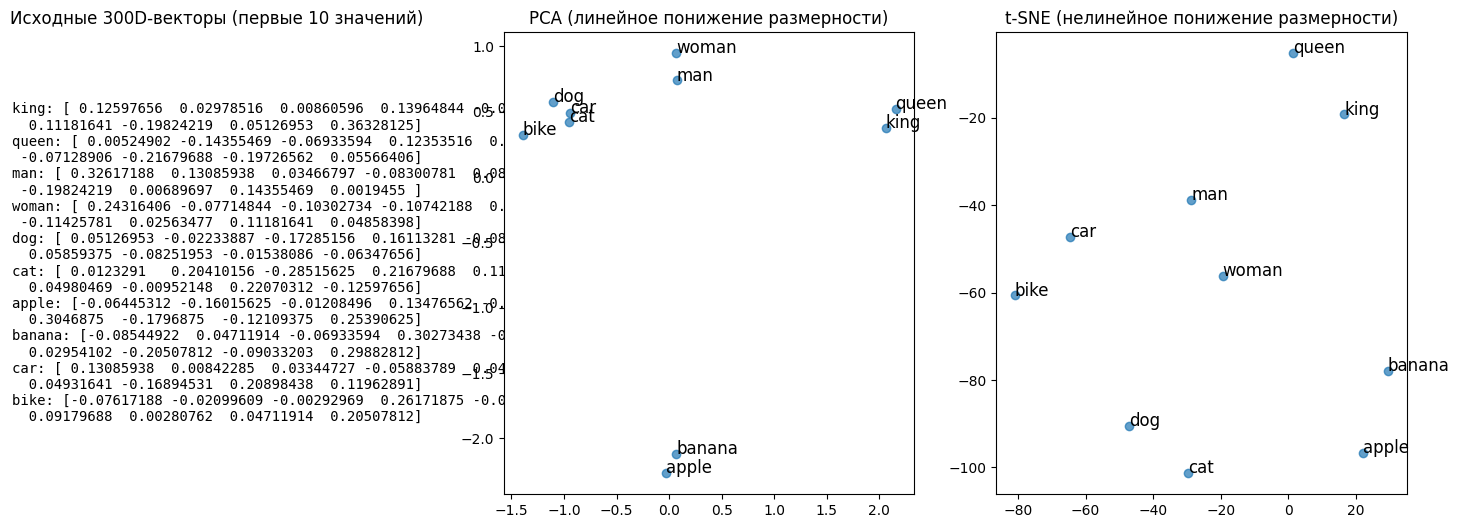

In [ ]:
import gensim.downloader as api
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Загружаем предобученную модель Word2Vec (на основе Google News)
word_vectors = api.load("word2vec-google-news-300")

# 🔹 Выбираем слова для анализа
words = ["king", "queen", "man", "woman", "dog", "cat", "apple", "banana", "car", "bike"]
vectors = np.array([word_vectors[word] for word in words])  # Извлекаем 300D-векторы

# 🔹 PCA: Линейное понижение размерности (300D → 2D)
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)

# 🔹 t-SNE: Нелинейное понижение размерности (300D → 2D)
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
vectors_tsne = tsne.fit_transform(vectors)

# 🔹 Функция визуализации (подписываем слова)
def plot_vectors(ax, vectors_2d, words, title):
    ax.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.7)
    for i, word in enumerate(words):
        ax.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=12)
    ax.set_title(title)

# 🔹 Визуализация "до и после"
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 1️⃣ Исходные эмбеддинги (300D) - Выводим 10 первых значений векторов для понимания структуры
axs[0].axis("off")  # Убираем оси
text = "\n".join([f"{word}: {vectors[i][:10]}" for i, word in enumerate(words)])
axs[0].text(0, 0.5, text, fontsize=10, verticalalignment="center", family="monospace")
axs[0].set_title("Исходные 300D-векторы (первые 10 значений)")

# 2️⃣ PCA (линейное понижение)
plot_vectors(axs[1], vectors_pca, words, "PCA (линейное понижение размерности)")

# 3️⃣ t-SNE (нелинейное понижение)
plot_vectors(axs[2], vectors_tsne, words, "t-SNE (нелинейное понижение размерности)")

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


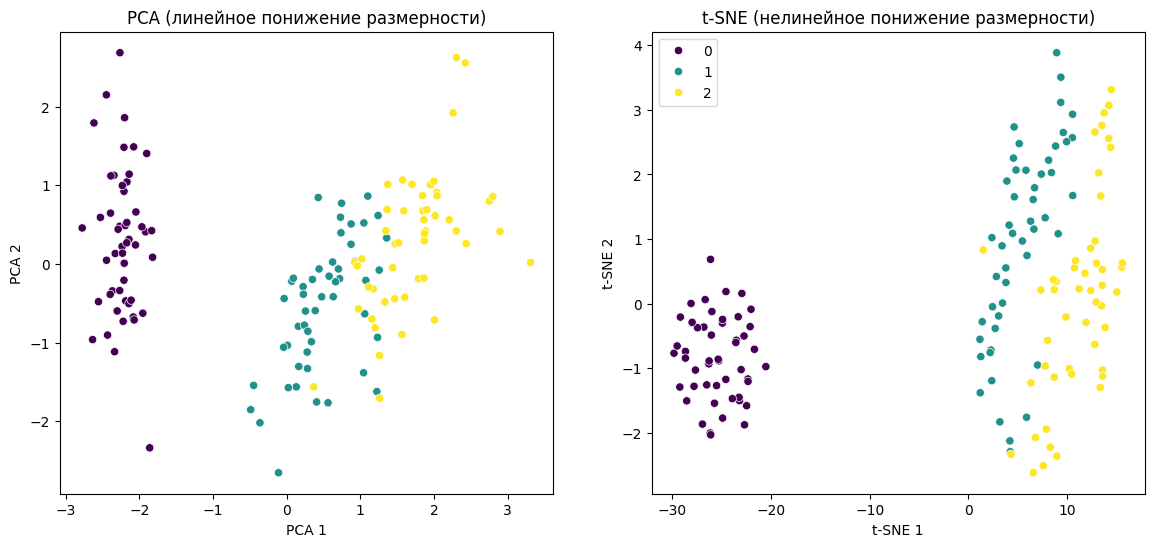

In [ ]:

# 🔹 Загружаем датасет Iris
iris = datasets.load_iris()
X = iris.data  # 4 признака (длина/ширина лепестков и чашелистиков)
y = iris.target  # Метки классов (0: setosa, 1: versicolor, 2: virginica)
target_names = iris.target_names  # Названия классов

# 🔹 Нормализуем данные (t-SNE чувствителен к масштабам)
X = StandardScaler().fit_transform(X)

# 🔹 PCA для сравнения
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 🔹 Применяем t-SNE (понижение размерности до 2D)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# 🔹 Визуализация PCA и t-SNE
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 1️⃣ График PCA
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="viridis", ax=axs[0], legend=False)
axs[0].set_title("PCA (линейное понижение размерности)")
axs[0].set_xlabel("PCA 1")
axs[0].set_ylabel("PCA 2")

# 2️⃣ График t-SNE
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="viridis", ax=axs[1], legend=True)
axs[1].set_title("t-SNE (нелинейное понижение размерности)")
axs[1].set_xlabel("t-SNE 1")
axs[1].set_ylabel("t-SNE 2")

plt.show()
